# CTCF 24h rep12

## make and read OR stat info

In [63]:
%%bash
python3 make_GpmC_peak_reads_mC_Odds_Ratio_stat_for_plot.py -i 293T_ERT_CTCF_24h_pd_rep12.bismark_bt2_pe.dedup.sortedn.merged.bam.convert.sam.reads_mC.filter1.in_GpmC_peaks.txt -s 293T_ERT_CTCF_24h_pd_rep12.bismark_bt2_pe.dedup.sortedn.merged.bam.convert.sam.reads_mC.filter1.in_GpmC_peaks.OR_stat.txt


[2023-06-14 17:26:45][INFO][make_GpmC_peak_reads_mC_Odds_Ratio_stat_for_plot] command line: python3 make_GpmC_peak_reads_mC_Odds_Ratio_stat_for_plot.py -i 293T_ERT_CTCF_24h_pd_rep12.bismark_bt2_pe.dedup.sortedn.merged.bam.convert.sam.reads_mC.filter1.in_GpmC_peaks.txt -s 293T_ERT_CTCF_24h_pd_rep12.bismark_bt2_pe.dedup.sortedn.merged.bam.convert.sam.reads_mC.filter1.in_GpmC_peaks.OR_stat.txt
[2023-06-14 17:28:24][INFO][make_GpmC_peak_reads_mC_Odds_Ratio_stat_for_plot] processing odds ratio stat info output ...
[2023-06-14 17:28:25][INFO][make_GpmC_peak_reads_mC_Odds_Ratio_stat_for_plot] Run completed!


In [64]:
import numpy as np
import pandas as pd
or_stat_df = pd.read_csv("293T_ERT_CTCF_24h_pd_rep12.bismark_bt2_pe.dedup.sortedn.merged.bam.convert.sam.reads_mC.filter1.in_GpmC_peaks.OR_stat.txt", sep='\t', header=(0))
or_stat_df = or_stat_df.sort_values(by=["stat_type", "log2OR"])
or_stat_df.head()


,gpmc_peak_name,occur_low,occur_high,non_occur_low,non_occur_high,odds_ratio,log2OR,stat_type
0,gpc_5,1,2,20,32,1.25,0.321928,real
1,gpc_5,1,2,20,32,1.25,0.321928,shuffled
2,gpc_8,1,1,7,4,1.75,0.807355,real
3,gpc_8,1,1,7,4,1.75,0.807355,shuffled
4,gpc_41,1,65,83,4,1348.75,10.397407,real


## get stat info for plot

In [65]:
or_stat_df[or_stat_df.stat_type=="real"].describe()

,occur_low,occur_high,non_occur_low,non_occur_high,odds_ratio,log2OR
count,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000
mean,9.023995,19.852789,517.759403,171.972763,50.251546,1.880040
std,220.991865,267.139285,7931.533822,2515.570645,291.299941,2.375165
min,1.000000,1.000000,1.000000,1.000000,0.074713,-3.742504
25%,1.000000,1.000000,15.000000,6.000000,1.333333,0.415037
50%,1.000000,2.000000,36.000000,17.000000,2.833990,1.502834
75%,2.000000,3.000000,78.000000,46.000000,6.000000,2.584963
max,8561.000000,7982.000000,205295.000000,68307.000000,4230.000000,12.046442


In [66]:
or_stat_df[or_stat_df.stat_type=="shuffled"].describe()

,occur_low,occur_high,non_occur_low,non_occur_high,odds_ratio,log2OR
count,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000
mean,18.741894,10.134890,508.041505,181.690661,2.304438,0.524983
std,271.009224,123.635903,7906.524915,2544.034528,3.712534,1.331327
min,1.000000,1.000000,1.000000,1.000000,0.050000,-4.321928
25%,1.000000,1.000000,13.000000,8.000000,0.800000,-0.321928
50%,2.000000,1.000000,33.000000,21.000000,1.338573,0.420685
75%,3.000000,2.000000,74.000000,49.750000,2.618750,1.388866
max,8716.000000,3990.000000,205140.000000,68861.000000,88.000000,6.459432


In [67]:
real_odds_ratio_array = or_stat_df[or_stat_df.stat_type=="real"]["odds_ratio"]
real_log2OR = or_stat_df[or_stat_df.stat_type=="real"]["log2OR"]
real_log2OR_mean = real_log2OR.mean()
real_log2OR_median = real_log2OR.median()
print(real_log2OR_mean, real_log2OR_median)

1.8800402587989102 1.5028343750433462


In [68]:
shuffled_odds_ratio_array = or_stat_df[or_stat_df.stat_type=="shuffled"]["odds_ratio"]
shuffled_log2OR = or_stat_df[or_stat_df.stat_type=="shuffled"]["log2OR"]
shuffled_log2OR_mean = shuffled_log2OR.mean()
shuffled_log2OR_median = shuffled_log2OR.median()
print(shuffled_log2OR_mean, shuffled_log2OR_median)

0.5249827216207467 0.4206845302866154


In [69]:
from scipy.stats import kstest
ks_stat, ks_pvalue = kstest(real_odds_ratio_array, shuffled_odds_ratio_array)
print(ks_stat, ks_pvalue)

0.2853437094682231 1.0669016112139486e-55


## make output plot

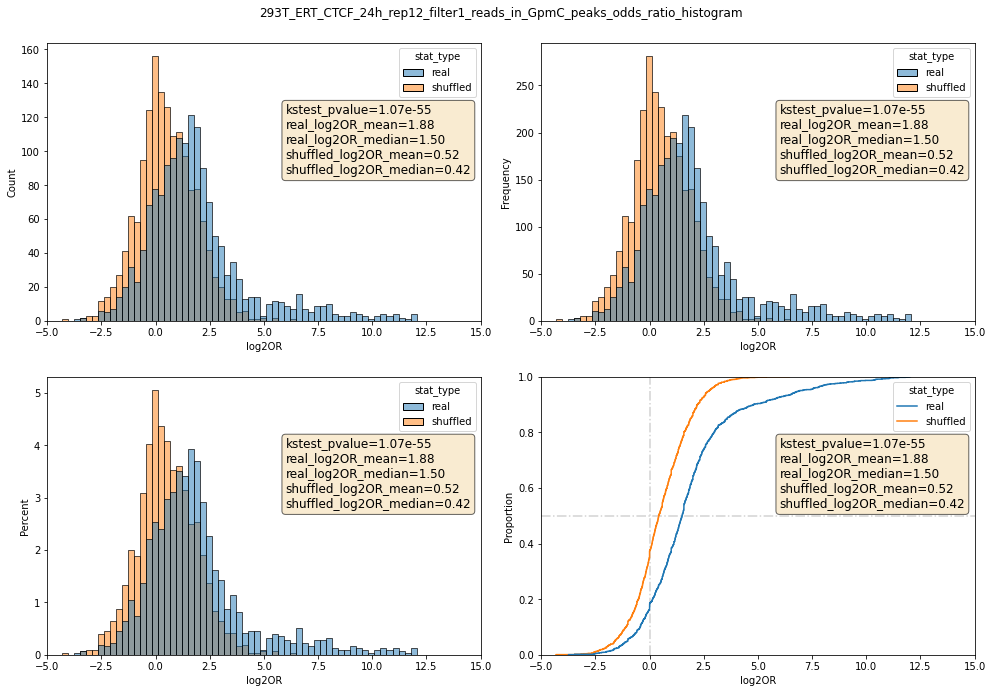

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 
matplotlib.rcParams['pdf.fonttype'] = 42

props = dict(boxstyle='round', facecolor='wheat', alpha=0.6)
textstr = '\n'.join(['kstest_pvalue='+format(ks_pvalue, '.2e'),
                    'real_log2OR_mean='+format(real_log2OR_mean, '.2f'), 
                    'real_log2OR_median='+format(real_log2OR_median, '.2f'), 
                    'shuffled_log2OR_mean='+format(shuffled_log2OR_mean, '.2f'), 
                    'shuffled_log2OR_median='+format(shuffled_log2OR_median, '.2f')])

fig = plt.figure(figsize=(14, 10))
fig.subplots_adjust(left=0.05, right=0.97, bottom=0.08, top=0.93, wspace=0.14)
fig.suptitle("293T_ERT_CTCF_24h_rep12_filter1_reads_in_GpmC_peaks_odds_ratio_histogram")
# ax1
ax1 = fig.add_subplot(2, 2, 1)
sns.histplot(or_stat_df, x="log2OR", hue="stat_type", stat="count", ax=ax1)
ax1.text(0.55, 0.78, textstr, fontsize=12, transform=ax1.transAxes, verticalalignment='top', bbox=props)
ax1.set_xlim(-5, 15)
# ax2
ax2 = fig.add_subplot(2, 2, 2)
sns.histplot(or_stat_df, x="log2OR", hue="stat_type", stat="frequency", ax=ax2)
ax2.text(0.55, 0.78, textstr, fontsize=12, transform=ax2.transAxes, verticalalignment='top', bbox=props)
ax2.set_xlim(-5, 15)
# ax3
ax3 = fig.add_subplot(2, 2, 3)
sns.histplot(or_stat_df, x="log2OR", hue="stat_type", stat="percent", ax=ax3)
ax3.text(0.55, 0.78, textstr, fontsize=12, transform=ax3.transAxes, verticalalignment='top', bbox=props)
ax3.set_xlim(-5, 15)
# ax4
ax4 = fig.add_subplot(2, 2, 4)
# sns.histplot(or_stat_df, x="log2OR", hue="stat_type", stat="density", ax=ax4)
sns.ecdfplot(or_stat_df, x="log2OR", hue="stat_type", ax=ax4)
ax4.text(0.55, 0.78, textstr, fontsize=12, transform=ax4.transAxes, verticalalignment='top', bbox=props)
ax4.hlines(y=0.5, xmin=-5, xmax=15, linestyles='-.', colors='lightgray')
ax4.vlines(x=0, ymin=0, ymax=1, linestyles='-.', colors='lightgray')
ax4.set_xlim(-5, 15)

fig.savefig("293T_ERT_CTCF_24h_pd_rep12.filter1_reads_in_GpmC_peaks_odds_ratio_histogram.pdf")
plt.show()


# CTCF 48h rep12

## make and read OR stat info

In [71]:
%%bash
python3 make_GpmC_peak_reads_mC_Odds_Ratio_stat_for_plot.py -i 293T_ERT_CTCF_48h_pd_rep12.bismark_bt2_pe.dedup.sortedn.merged.bam.convert.sam.reads_mC.filter1.in_GpmC_peaks.txt -s 293T_ERT_CTCF_48h_pd_rep12.bismark_bt2_pe.dedup.sortedn.merged.bam.convert.sam.reads_mC.filter1.in_GpmC_peaks.OR_stat.txt


[2023-06-14 17:28:39][INFO][make_GpmC_peak_reads_mC_Odds_Ratio_stat_for_plot] command line: python3 make_GpmC_peak_reads_mC_Odds_Ratio_stat_for_plot.py -i 293T_ERT_CTCF_48h_pd_rep12.bismark_bt2_pe.dedup.sortedn.merged.bam.convert.sam.reads_mC.filter1.in_GpmC_peaks.txt -s 293T_ERT_CTCF_48h_pd_rep12.bismark_bt2_pe.dedup.sortedn.merged.bam.convert.sam.reads_mC.filter1.in_GpmC_peaks.OR_stat.txt
[2023-06-14 17:29:59][INFO][make_GpmC_peak_reads_mC_Odds_Ratio_stat_for_plot] processing odds ratio stat info output ...
[2023-06-14 17:29:59][INFO][make_GpmC_peak_reads_mC_Odds_Ratio_stat_for_plot] Run completed!


In [72]:
import numpy as np
import pandas as pd
or_stat_df = pd.read_csv("293T_ERT_CTCF_48h_pd_rep12.bismark_bt2_pe.dedup.sortedn.merged.bam.convert.sam.reads_mC.filter1.in_GpmC_peaks.OR_stat.txt", sep='\t', header=(0))
or_stat_df = or_stat_df.sort_values(by=["stat_type", "log2OR"])
or_stat_df.head()


,gpmc_peak_name,occur_low,occur_high,non_occur_low,non_occur_high,odds_ratio,log2OR,stat_type
0,gpc_19,1,24,36,7,123.428571,6.947533,real
1,gpc_19,12,13,25,18,1.504630,0.589408,shuffled
2,gpc_26,5,51,74,14,53.914286,5.752596,real
3,gpc_26,32,24,47,41,0.859756,-0.218001,shuffled
4,gpc_36,2,13,63,43,9.523256,3.251455,real


## get stat info for plot

In [73]:
or_stat_df[or_stat_df.stat_type=="real"].describe()

,occur_low,occur_high,non_occur_low,non_occur_high,odds_ratio,log2OR
count,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000
mean,12.724682,26.585203,279.772286,96.961795,117.921199,2.633593
std,506.742470,401.384161,4977.561560,1785.073438,669.055089,2.773229
min,1.000000,1.000000,1.000000,1.000000,0.083333,-3.584963
25%,1.000000,1.250000,21.000000,5.000000,1.768182,0.822265
50%,2.000000,3.000000,46.000000,16.000000,3.929792,1.974451
75%,3.000000,6.000000,94.000000,41.000000,11.034845,3.463994
max,29039.000000,17838.000000,184129.000000,71032.000000,15708.500000,13.939258


In [74]:
or_stat_df[or_stat_df.stat_type=="shuffled"].describe()

,occur_low,occur_high,non_occur_low,non_occur_high,odds_ratio,log2OR
count,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000
mean,25.635537,13.674348,266.861431,109.872650,2.085034,0.448750
std,559.680498,191.999455,4938.776627,1822.630405,2.694582,1.259182
min,1.000000,1.000000,1.000000,1.000000,0.067797,-3.882643
25%,2.000000,1.000000,19.000000,8.000000,0.781250,-0.356144
50%,3.000000,2.000000,42.000000,22.000000,1.250000,0.321928
75%,6.000000,4.000000,87.000000,49.000000,2.333333,1.222392
max,29610.000000,8269.000000,183159.000000,71801.000000,41.000000,5.357552


In [75]:
real_odds_ratio_array = or_stat_df[or_stat_df.stat_type=="real"]["odds_ratio"]
real_log2OR = or_stat_df[or_stat_df.stat_type=="real"]["log2OR"]
real_log2OR_mean = real_log2OR.mean()
real_log2OR_median = real_log2OR.median()
print(real_log2OR_mean, real_log2OR_median)

2.633592859830049 1.974451005358681


In [76]:
shuffled_odds_ratio_array = or_stat_df[or_stat_df.stat_type=="shuffled"]["odds_ratio"]
shuffled_log2OR = or_stat_df[or_stat_df.stat_type=="shuffled"]["log2OR"]
shuffled_log2OR_mean = shuffled_log2OR.mean()
shuffled_log2OR_median = shuffled_log2OR.median()
print(shuffled_log2OR_mean, shuffled_log2OR_median)

0.44874988074698674 0.32192809488736235


In [77]:
from scipy.stats import kstest
ks_stat, ks_pvalue = kstest(real_odds_ratio_array, shuffled_odds_ratio_array)
print(ks_stat, ks_pvalue)

0.4272286234081261 2.0747881355153517e-270


## make output plot

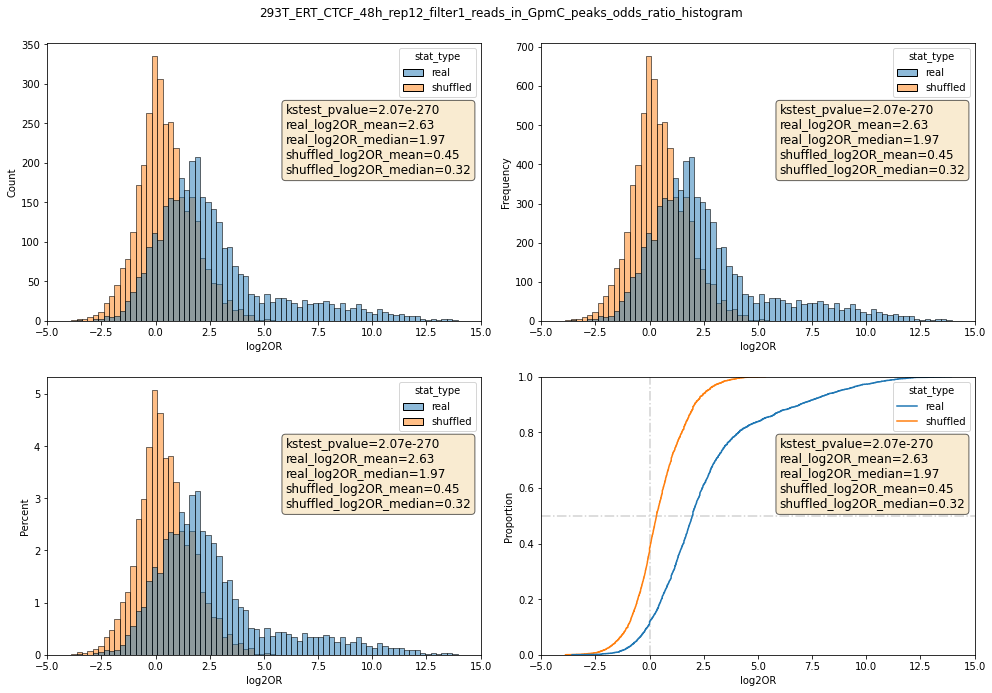

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 
matplotlib.rcParams['pdf.fonttype'] = 42

props = dict(boxstyle='round', facecolor='wheat', alpha=0.6)
textstr = '\n'.join(['kstest_pvalue='+format(ks_pvalue, '.2e'),
                    'real_log2OR_mean='+format(real_log2OR_mean, '.2f'), 
                    'real_log2OR_median='+format(real_log2OR_median, '.2f'), 
                    'shuffled_log2OR_mean='+format(shuffled_log2OR_mean, '.2f'), 
                    'shuffled_log2OR_median='+format(shuffled_log2OR_median, '.2f')])

fig = plt.figure(figsize=(14, 10))
fig.subplots_adjust(left=0.05, right=0.97, bottom=0.08, top=0.93, wspace=0.14)
fig.suptitle("293T_ERT_CTCF_48h_rep12_filter1_reads_in_GpmC_peaks_odds_ratio_histogram")
# ax1
ax1 = fig.add_subplot(2, 2, 1)
sns.histplot(or_stat_df, x="log2OR", hue="stat_type", stat="count", ax=ax1)
ax1.text(0.55, 0.78, textstr, fontsize=12, transform=ax1.transAxes, verticalalignment='top', bbox=props)
ax1.set_xlim(-5, 15)
# ax2
ax2 = fig.add_subplot(2, 2, 2)
sns.histplot(or_stat_df, x="log2OR", hue="stat_type", stat="frequency", ax=ax2)
ax2.text(0.55, 0.78, textstr, fontsize=12, transform=ax2.transAxes, verticalalignment='top', bbox=props)
ax2.set_xlim(-5, 15)
# ax3
ax3 = fig.add_subplot(2, 2, 3)
sns.histplot(or_stat_df, x="log2OR", hue="stat_type", stat="percent", ax=ax3)
ax3.text(0.55, 0.78, textstr, fontsize=12, transform=ax3.transAxes, verticalalignment='top', bbox=props)
ax3.set_xlim(-5, 15)
# ax4
ax4 = fig.add_subplot(2, 2, 4)
# sns.histplot(or_stat_df, x="log2OR", hue="stat_type", stat="density", ax=ax4)
sns.ecdfplot(or_stat_df, x="log2OR", hue="stat_type", ax=ax4)
ax4.text(0.55, 0.78, textstr, fontsize=12, transform=ax4.transAxes, verticalalignment='top', bbox=props)
ax4.hlines(y=0.5, xmin=-5, xmax=15, linestyles='-.', colors='lightgray')
ax4.vlines(x=0, ymin=0, ymax=1, linestyles='-.', colors='lightgray')
ax4.set_xlim(-5, 15)

fig.savefig("293T_ERT_CTCF_48h_pd_rep12.filter1_reads_in_GpmC_peaks_odds_ratio_histogram.pdf")
plt.show()
